<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Log%C3%ADstica%20II/modeloTransporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#from google.colab import files 
#uploaded = files.upload()

In [ ]:
#data = pd.read_excel('/content/drive/My Drive/datos_transporte.xls')
#df = pd.DataFrame(data)
#df

In [ ]:
i=0.3
ss = 19178
c= 30
D = 700000

Esta es una estructura de datos llamada diccionario: Usa claves y datos

In [ ]:
data = {'Modo': ['Ferroviario', 'Fluvial', 'Carretera', 'Aéreo'], 'tau':[0.0575, 0.0384, 0.0137, 0.0055], 'r':[0.1,0.15,0.2,1.4], 'N':[10,20,20,40],'cap':[1000000, 17500, 8750, 17500], 'A':[2000,5000,1500,1000]}

DataFrame es una estructura de Pandas. Es una tabla indexada

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Modo,tau,r,N,cap,A
0,Ferroviario,0.0575,0.10,10,1000000,2000
1,Fluvial,0.0384,0.15,20,17500,5000
2,Carretera,0.0137,0.20,20,8750,1500
3,Aéreo,0.0055,1.40,40,17500,1000


Un dataframe es como una matriz. Pero en lugar de decir df[0][3], decimos df.at[0, 'tau'] o df.loc[0, 'tau']

In [ ]:
print(df.at[0,'tau'])

0.0575


In [ ]:
print(df.loc[0,'tau'])

0.0575


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Modo    4 non-null      object 
 1   tau     4 non-null      float64
 2   r       4 non-null      float64
 3   N       4 non-null      int64  
 4   cap     4 non-null      int64  
 5   A       4 non-null      int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 320.0+ bytes


In [ ]:
df.describe()




,tau,r,N,cap,A
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.028775,0.462500,22.500000,260937.500000,2375.000000
std,0.023712,0.626332,12.583057,492725.598711,1796.988221
min,0.005500,0.100000,10.000000,8750.000000,1000.000000
25%,0.011650,0.137500,17.500000,15312.500000,1375.000000
50%,0.026050,0.175000,20.000000,17500.000000,1750.000000
75%,0.043175,0.500000,25.000000,263125.000000,2750.000000
max,0.057500,1.400000,40.000000,1000000.000000,5000.000000


Añadamos la columna Q con Q = D/N


In [ ]:
df['Q']=D/df['N']

In [ ]:
df

,Modo,tau,r,N,cap,A,Q
0,Ferroviario,0.0575,0.10,10,1000000,2000,70000.0
1,Fluvial,0.0384,0.15,20,17500,5000,35000.0
2,Carretera,0.0137,0.20,20,8750,1500,35000.0
3,Aéreo,0.0055,1.40,40,17500,1000,17500.0


Cambiemos el índice de la tabla. Ahora el índice debe ser 'Modo'

In [ ]:
df.set_index('Modo', inplace=True)

In [ ]:
df

,tau,r,N,cap,A,Q
Modo,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0
Carretera,0.0137,0.20,20,8750,1500,35000.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0


Tomemos el modo de transporte 'Ferroviario'. df.loc['Ferroviario] toma todas las columnas de la fila 'Ferroviario'

In [ ]:
print( df.loc['Ferroviario','Q'])

70000.0


'slicing' = tomar trozos del dataframe. df_m es un nuevo dataframe

In [ ]:
df_m = df.loc['Aéreo']

In [ ]:
df_m

tau        0.0055
r          1.4000
N         40.0000
cap    17500.0000
A       1000.0000
Q      17500.0000
Name: Aéreo, dtype: float64

Asignemos los valores de la tabla a variables simples. Modo ferroviario

In [ ]:
Q = df_m.loc['Q']
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
N = df_m.loc['N']
r = df_m.loc['r']

Hallemos el número de camiones. Usemos la función `trunc` que redondea hacia arriba:

In [ ]:
n = Q/cap

if math.trunc(n)<n: n = math.trunc(n)+1
print ('Número de vehículos por envío', n)


Número de vehículos por envío 1.0


In [ ]:
cprima = c+ r + A*n/Q
costo_inv_planta = i*c*(Q/2+ss)
costo_inv_cd = i*cprima*(Q/2+ss)
costo_inv_transito =  i*c*D*tau
costo_transporte = r*D
costo_total= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*D/Q + i*cprima*(Q/2+ss)

In [ ]:
print('c_prima', cprima)
print('Costo inv planta', costo_inv_planta)
print('Costo inv cd',costo_inv_cd)
print('Costo inv tránsito', costo_inv_transito)
print('Costo transporte', costo_transporte)
print('Costo total anual',costo_total)

c_prima 31.457142857142856
Costo inv planta 251352.0
Costo inv cd 263560.5257142857
Costo inv tránsito 34650.0
Costo transporte 979999.9999999999
Costo total anual 1569562.5257142857


In [ ]:
df['n']=df['Q']/df['cap']


In [ ]:
df

,tau,r,N,cap,A,Q,n
Modo,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,0.07
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.00
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.00
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.00


In [ ]:
import numpy as np

In [ ]:
df['n']=np.ceil(df['n'])

In [ ]:
df

,tau,r,N,cap,A,Q,n
Modo,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0


In [ ]:
np.max(df['Q'])

70000.0

In [ ]:
df.index

Index(['Ferroviario', 'Fluvial', 'Carretera', 'Aéreo'], dtype='object', name='Modo')

In [ ]:
df['C_prima']=c+df['r']+df['A']*df['n']/df['Q']
df

,tau,r,N,cap,A,Q,n,C_prima
Modo,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143


In [ ]:
df['costo_inv_planta']=i*c*(df['Q']/2+ss)
df

,tau,r,N,cap,A,Q,n,C_prima,costo_inv_planta
Modo,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0


In [ ]:
df['costo_anual_transporte']=D*(df['r']+df['A']*df['n']/df['Q'])
df

,tau,r,N,cap,A,Q,n,C_prima,costo_inv_planta,costo_anual_transporte
Modo,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,90000.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,305000.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,260000.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,1020000.0


In [ ]:
df['costo_anual_inv_transito']=i*c*D*df['tau']
df

,tau,r,N,cap,A,Q,n,C_prima,costo_inv_planta,costo_anual_transporte,costo_anual_inv_transito
Modo,,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,90000.0,362250.0
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,305000.0,241920.0
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,260000.0,86310.0
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,1020000.0,34650.0


In [ ]:
df['costo_anual_inv_CD']=i*df['C_prima']*(df['Q']/2+ss)
df

,tau,r,N,cap,A,Q,n,C_prima,costo_inv_planta,costo_anual_transporte,costo_anual_inv_transito,costo_anual_inv_CD
Modo,,,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,90000.0,362250.0,489691.722857
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,305000.0,241920.0,334896.338571
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,260000.0,86310.0,334188.977143
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,1020000.0,34650.0,263560.525714


In [ ]:
df['Costo_Total']=df['costo_anual_inv_CD']+df['costo_anual_inv_transito']+df['costo_anual_transporte']+df['costo_inv_planta']
df

,tau,r,N,cap,A,Q,n,C_prima,costo_inv_planta,costo_anual_transporte,costo_anual_inv_transito,costo_anual_inv_CD,Costo_Total
Modo,,,,,,,,,,,,,
Ferroviario,0.0575,0.10,10,1000000,2000,70000.0,1.0,30.128571,487602.0,90000.0,362250.0,489691.722857,1.429544e+06
Fluvial,0.0384,0.15,20,17500,5000,35000.0,2.0,30.435714,330102.0,305000.0,241920.0,334896.338571,1.211918e+06
Carretera,0.0137,0.20,20,8750,1500,35000.0,4.0,30.371429,330102.0,260000.0,86310.0,334188.977143,1.010601e+06
Aéreo,0.0055,1.40,40,17500,1000,17500.0,1.0,31.457143,251352.0,1020000.0,34650.0,263560.525714,1.569563e+06


In [ ]:
df['Costo_Total']

Modo
Ferroviario    1.429544e+06
Fluvial        1.211918e+06
Carretera      1.010601e+06
Aéreo          1.569563e+06
Name: Costo_Total, dtype: float64

In [ ]:
df_m = df.loc['Fluvial',['tau','r','A','cap']]
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
r = df_m.loc['r']
i=0.3
ss = 19178
c= 30
D = 700000
df_m

tau        0.0384
r          0.1500
A       5000.0000
cap    17500.0000
Name: Fluvial, dtype: float64

In [ ]:
n= 1
Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
print('Q=',Q)
if Q/n > cap:
  print('Infactible')
else:
    print('Factible')

Q= 19776.436827402747
Infactible


In [ ]:
n= 2
Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
print('Q=',Q)
if Q/n > cap:
  print('Infactible')
else:
    print('Factible')

Q= 27968.10517672771
Factible


In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
for n in range(1,11):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  Q=round(Q)
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  print('Q=',Q,' con n=',n,' Con Costo=',Costo)
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
print('Costo Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Q= 17500  con n= 1  Con Costo= 1053274.5885714286
Q= 27968  con n= 2  Con Costo= 1208885.4267276889
Q= 34254  con n= 3  Con Costo= 1321813.1679847608
Q= 39553  con n= 4  Con Costo= 1415763.1629265163
Q= 44221  con n= 5  Con Costo= 1498973.6226483458
Q= 48442  con n= 6  Con Costo= 1588118.02010879
Q= 52324  con n= 7  Con Costo= 1664178.8016436053
Q= 55936  con n= 8  Con Costo= 1727783.8434553775
Q= 59329  con n= 9  Con Costo= 1779396.7649161876
Q= 62539  con n= 10  Con Costo= 1869344.987193791
Costo Optimo= 1053274.5885714286 
Con Q optimo= 17500 
Con n Optimo= 1 
Con N Optimo= 40


In [ ]:
def calc_costoTotal(tau, cap, A, r, i, c, D, ss, N):
  Q = D/N #tamaño de lote

  n = math.ceil(Q/cap) #redondea hacia arriba el # de vehículos

  cprima = c+ r + A*n/Q

  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  costo_total= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*D/Q + i*cprima*(Q/2+ss) 
  return costo_total #devuelve el costo total anual

In [ ]:
n=1 #número de vehículos

Q1= n*cap

N= D/(n*cap) #número de envíos

print ('Número de envíos', N)

costo1 = calc_costoTotal(tau, cap, A, r, i, c, D, ss, N)

print ('Tamaño de lote', Q1,' Costo total', costo1)


Número de envíos 40.0
Tamaño de lote 17500.0  Costo total 1053274.5885714286


In [ ]:
num_val = 101

costo_array= np.zeros(num_val)

n_array = np.zeros(num_val)

q_array = np.zeros(num_val)



for k in range(0,num_val):

  n_array[k] = k+1

  q_array[k] = D/(k+1)

  costo_array[k]= calc_costoTotal(tau, cap, A, r, i, c, D, ss, k+1)


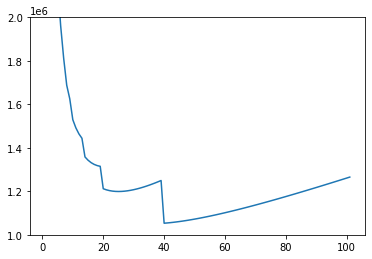

In [ ]:
import matplotlib.pyplot as plt

plt.ylim((1000000,2000000))

plt.plot(n_array,costo_array)

In [ ]:
Metodo='Fluvial'
df_m = df.loc[Metodo,['tau','r','A','cap']]
tau = df_m.loc['tau']
cap = df_m.loc['cap']
A = df_m.loc['A']
r = df_m.loc['r']

i=0.3
ss = 19178
c= 30
D = 700000
df_m

tau        0.0384
r          0.1500
A       5000.0000
cap    17500.0000
Name: Fluvial, dtype: float64

In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
for n in range(1,101):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  
  Q=round(Q)
  
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
print('Resultado para método de transporte ',Metodo,'\nCosto Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Costo Optimo= 1053274.5885714286 
Con Q optimo= 17500 
Con n Optimo= 1 
Con N Optimo= 40


In [ ]:
df_F = df.loc['Ferroviario',['tau','r','A','cap']]
tau = df_F.loc['tau']
cap = df_F.loc['cap']
A = df_F.loc['A']
r = df_F.loc['r']

df_F

tau          0.0575
r            0.1000
A         2000.0000
cap    1000000.0000
Name: Ferroviario, dtype: float64

In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
for n in range(1,101):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  
  Q=round(Q)
  
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
print('Costo Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Costo Optimo= 1004053.622628866 
Con Q optimo= 12513 
Con n Optimo= 1 
Con N Optimo= 56


In [ ]:
df_F = df.loc['Carretera',['tau','r','A','cap']]
tau = df_F.loc['tau']
cap = df_F.loc['cap']
A = df_F.loc['A']
r = df_F.loc['r']

df_F

tau       0.0137
r         0.2000
A      1500.0000
cap    8750.0000
Name: Carretera, dtype: float64

In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
for n in range(1,101):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  
  Q=round(Q)
  
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
print('Costo Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Costo Optimo= 772888.4771428572 
Con Q optimo= 8750 
Con n Optimo= 1 
Con N Optimo= 80


In [ ]:
df_F = df.loc['Aéreo',['tau','r','A','cap']]
tau = df_F.loc['tau']
cap = df_F.loc['cap']
A = df_F.loc['A']
r = df_F.loc['r']

df_F

tau        0.0055
r          1.4000
A       1000.0000
cap    17500.0000
Name: Aéreo, dtype: float64

In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
for n in range(1,101):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  
  Q=round(Q)
  
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
print('Costo Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Costo Optimo= 1529340.3309801233 
Con Q optimo= 8754 
Con n Optimo= 1 
Con N Optimo= 80


In [ ]:
QOptimo=''
nOptimo=''
CostoOptimo=''
Costos=[]
Qs=[]
for n in range(1,101):
  Q = math.sqrt((2*A*n*(D+i*ss))/(i*(2*c+r)))
  if Q/n > cap:
    Q=cap*n
  
  Q=round(Q)
  
  cprima = c+ r + A*n/Q
  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*math.ceil(D/Q) + i*cprima*(Q/2+ss) 
  
  if CostoOptimo=='':
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  elif CostoOptimo>Costo:
    CostoOptimo=Costo
    QOptimo=Q
    nOptimo=n
    NOptimo=math.ceil(D/Q)
  Qs.append(Q)
  Costos.append(Costo)
print('Costo Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo)

Costo Optimo= 1529340.3309801233 
Con Q optimo= 8754 
Con n Optimo= 1 
Con N Optimo= 80


In [ ]:
Costos=[]
Ns=[]
for N in range(1,1001):
  Q = D/N #tamaño de lote

  n = math.ceil(Q/cap) #redondea hacia arriba el # de vehículos

  cprima = c+ r + A*n/Q

  costo_inv_planta = i*c*(Q/2+ss)
  costo_inv_cd = i*cprima*(Q/2+ss)
  costo_inv_transito =  i*c*D*tau
  Costo= i*c*(Q/2+ss) + i*c*D*tau + r*D + A*n*D/Q + i*cprima*(Q/2+ss) 

  Ns.append(N)
  Costos.append(Costo)

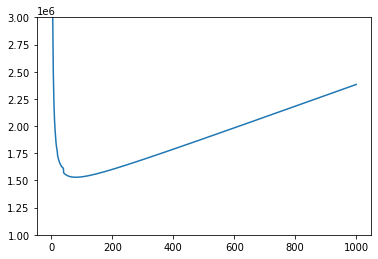

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(Ns,Costos)
plt.ylim((1000000,3000000))
plt.show()